# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [48]:
print(mouse_metadata.columns)
print(study_results.columns)
print(f'shape mouse: {mouse_metadata.shape}','\n',f'shape study: {study_results.shape}')

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')
shape mouse: (249, 5) 
 shape study: (1893, 4)


In [49]:
# Combine the data into a single DataFrame
mouse_study_df = mouse_metadata.merge(study_results, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dups = mouse_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [53]:
# Checking the number of mice in the clean DataFrame.
len(dropped_dups["Mouse ID"].unique())

249

In [54]:
dropped_dups.set_index("Drug Regimen", inplace=True)
dropped_dups.head(3)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1


In [55]:
# Checking the number of mice in the clean DataFrame.
#!!! answers says 248. Why?

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groupby = dropped_dups.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean =  drug_groupby["Tumor Volume (mm3)"].mean().rename('Mean Tumor Volume')
drug_summary = pd.DataFrame(tumor_mean, index=dropped_dups.index.unique())
drug_summary['Median Tumor Volume'] = drug_groupby["Tumor Volume (mm3)"].median()
drug_summary['Tumor Volume Variance'] = drug_groupby["Tumor Volume (mm3)"].var()
drug_summary['Tumor Volume Std. Dev.'] = drug_groupby["Tumor Volume (mm3)"].std()
drug_summary['Tumor Volume Std. Err.'] = drug_groupby["Tumor Volume (mm3)"].sem()
drug_summary.sort_index()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_summary_agg = drug_groupby["Tumor Volume (mm3)"].agg(['mean',
                                                        'median', 
                                                        'var', 
                                                        'std',
                                                        'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
count_bar = drug_groupby.count()["Mouse ID"].sort_values(ascending=False)
count_bar

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

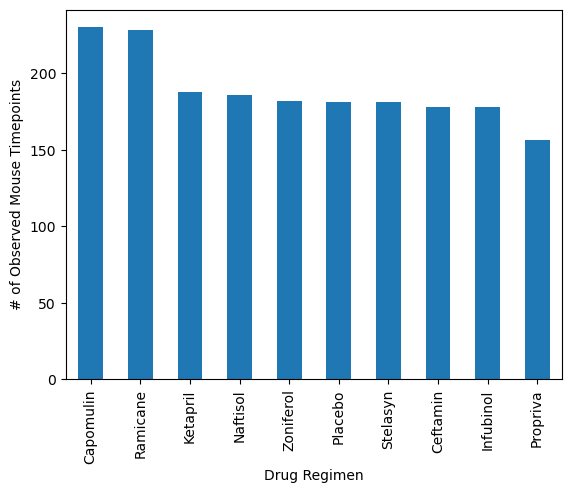

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_bar.plot(kind="bar", ylabel='# of Observed Mouse Timepoints')

In [97]:
count_bar = drug_groupby.count()["Mouse ID"].sort_values(ascending=False)
count_bar

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Mouse ID, dtype: int64

/tmp/ipykernel_20091/256996848.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=count_bar.index,rotation=90)


''

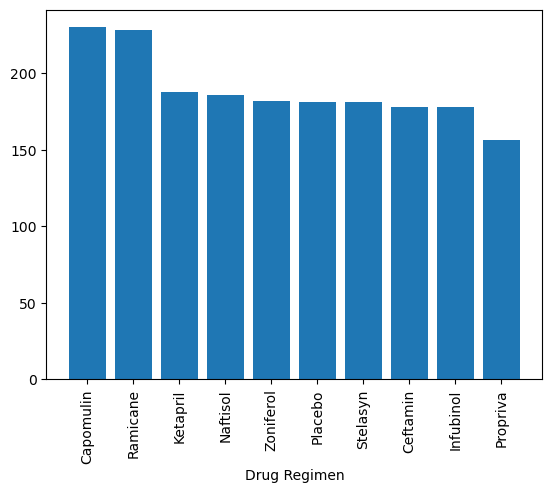

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()
ax.bar(count_bar.index, count_bar.values)
ax.set_xlabel('Drug Regimen')
ax.set_xticklabels(labels=count_bar.index,rotation=90)
;

In [119]:
gender_series = dropped_dups.groupby('Sex').count()['Mouse ID'].sort_values(ascending=False)
gender_series

KeyError: 'Sex'

<Axes: ylabel='Sex'>

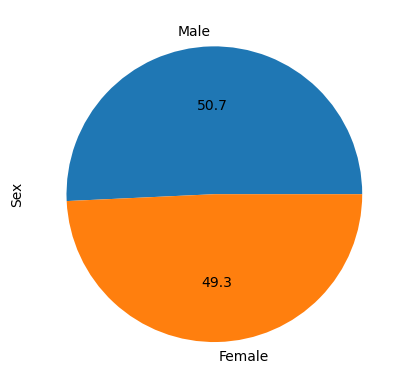

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_series.plot(kind='pie', autopct="%.1f", label='Sex')

''

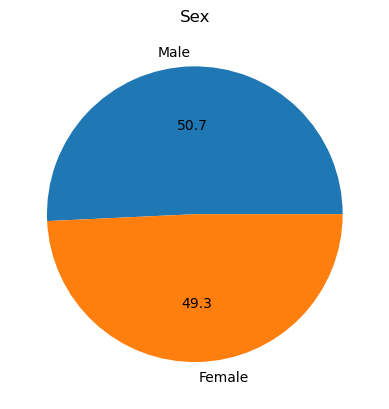

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
ax.pie(gender_series.values, autopct="%.1f", labels=gender_series.index)
ax.set_title('Sex')
;

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


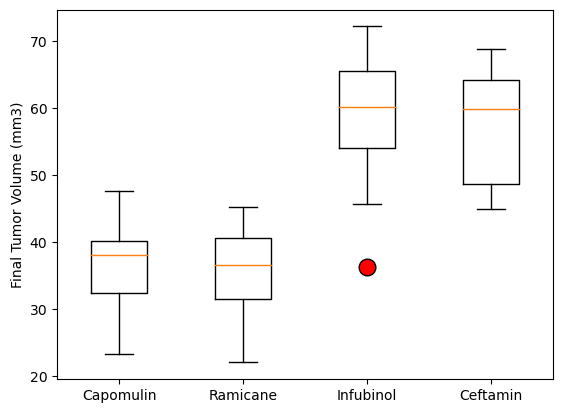

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

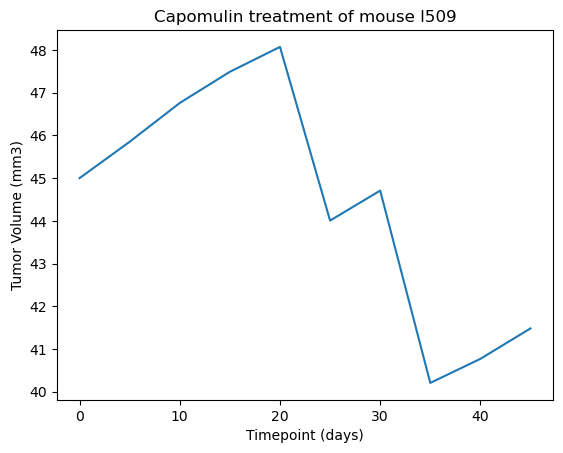

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


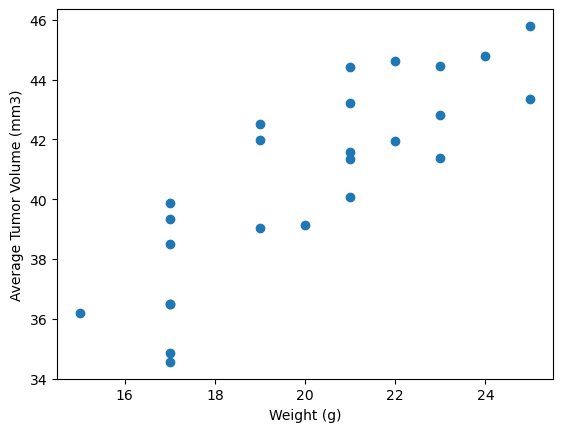

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


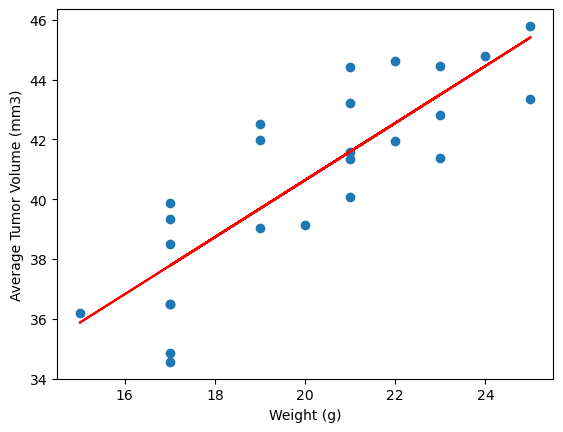

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
